### *Imports and Setup*

This cell imports the required libraries for clustering and evaluation: pandas for data manipulation, scikit-learn for KMeans clustering and Adjusted Rand Index calculation, and matplotlib for plotting.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


### *Loading Preprocessed Iris Dataset*

This cell loads the preprocessed Iris dataset from a CSV file. It separates the features (`X`) from the species labels (`y`) to prepare for clustering analysis.


In [ ]:
df_preprocessed = pd.read_csv("preprocessed_iris.csv") # reading the preprocessed iris dataset csv file

X = df_preprocessed.drop('species', axis=1) # separating features (X) from the target variable
y = df_preprocessed['species'] # extracting the actual classes (y) from the dataset


### *K-Means Clustering (k=3) and Evaluation*

This cell applies K-Means clustering with 3 clusters to the feature data. It then evaluates the clustering performance using the Adjusted Rand Index (ARI), which measures how well the clusters match the true species labels.

In [ ]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10) # initializing KMeans with 3 clusters
kmeans_3.fit(X)# fitting the model to the data
y_pred_3 = kmeans_3.labels_# predicting the cluster labels

ari_3 = adjusted_rand_score(y, y_pred_3)# calculating the Adjusted Rand Index
print(f"Adjusted Rand Index for k=3: {ari_3:.4f}")# printing the adjusted rand index score

Adjusted Rand Index for k=3: 0.9799


### *Comparing ARI Scores for Different k*

This cell runs K-Means clustering for k values of 2, 3, and 4, calculating the ARI score for each. The results help determine which number of clusters best matches the actual species distribution in the dataset.


In [ ]:
ari_scores = {} # initializing a dictionary to store Adjusted Rand Index scores for different k values
for k in [2, 3, 4]:# iterating over different values of k for KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)# initializing KMeans with k clusters
    kmeans.fit(X)# fitting the model to the data
    y_pred = kmeans.labels_# predicting the cluster labels
    # calculating the Adjusted Rand Index
    ari = adjusted_rand_score(y, y_pred)
    ari_scores[k] = ari # storing the Adjusted Rand Index score in the dictionary
    # printing the Adjusted Rand Index score for the current k value
    print(f"Adjusted Rand Index for k={k}: {ari:.4f}")

Adjusted Rand Index for k=2: 0.5584
Adjusted Rand Index for k=3: 0.9799
Adjusted Rand Index for k=4: 0.8588


### *Elbow Method for Optimal k*

This cell computes the Within-Cluster Sum of Squares (WCSS) for k values from 1 to 10 and plots the elbow curve. The plot helps identify the optimal number of clusters by showing where adding more clusters yields diminishing returns in reducing WCSS.


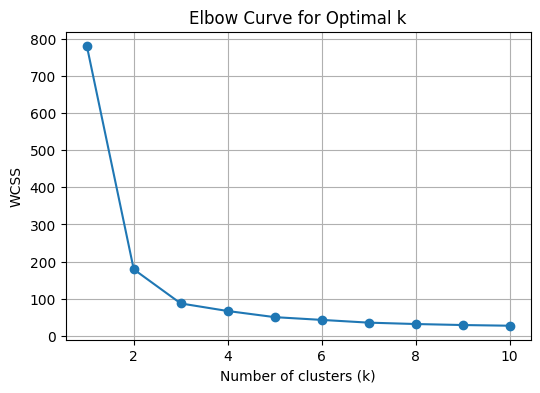

In [ ]:
wcss = []  # initializing a list to store the Within-Cluster Sum of Squares (WCSS) for each k
K_range = range(1, 11)# defining the range of k values to evaluate
for k in K_range:# iterating over the range of k values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)# initializing KMeans with k clusters
    kmeans.fit(X)# fitting the model to the data
    wcss.append(kmeans.inertia_)# appending the WCSS for the current k to the list

plt.figure(figsize=(6,4))# plotting the elbow curve
plt.plot(K_range, wcss, marker='o')# plotting the WCSS against k values
plt.title('Elbow Curve for Optimal k')# setting the title of the plot
plt.xlabel('Number of clusters (k)')# setting the x-axis label
plt.ylabel('WCSS')# setting the y-axis label
plt.grid(True)# adding grid lines to the plot
plt.savefig("figures/elbow_curve.png")# saving the plot as an image file
plt.show()# displaying the plot

### *Cluster Visualization*

This cell visualizes the clustering results for k=3 by plotting petal length versus petal width, with points colored by their assigned cluster. The plot provides a visual assessment of how well the clustering separates the data.

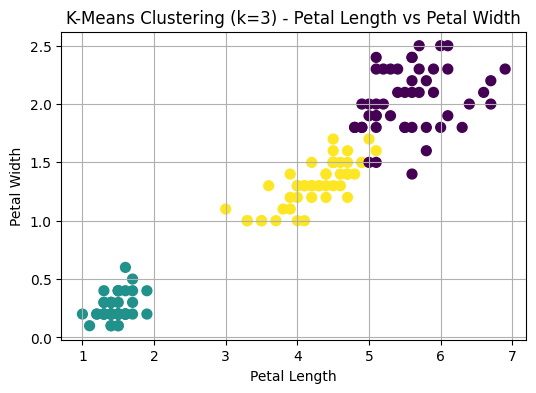

In [ ]:
plt.figure(figsize=(6,4))# plotting the clusters for k=3
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_pred_3, cmap='viridis', s=50)# plotting the data points with colors based on predicted clusters
plt.title('K-Means Clustering (k=3) - Petal Length vs Petal Width')# setting the title of the plot
plt.xlabel('Petal Length')# setting the x-axis label
plt.ylabel('Petal Width')# setting the y-axis label
plt.grid(True)# adding grid lines to the plot
plt.savefig("figures/clusters_k3.png")# saving the plot as an image file
plt.show()# displaying the plot

### *Saving Clustered Dataset*

This cell adds the cluster assignments to the preprocessed dataset and saves the result as `iris_with_clusters.csv`. A confirmation message is printed to indicate that the clustered dataset has been successfully saved, making it available for further analysis or reporting.

In [ ]:
df_preprocessed['Cluster'] = y_pred_3 # adding the cluster labels to the preprocessed DataFrame
df_preprocessed.to_csv("iris_with_clusters.csv", index=False)# saving the clustered dataset to a CSV file
print("✅ Clustered dataset saved as iris_with_clusters.csv")# displaying a success message

✅ Clustered dataset saved as iris_with_clusters.csv
